In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project/AIProject/Augmented Images/Augmented Images',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8120 files belonging to 6 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project/AIProject/Augmented Images/Augmented Images',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8120 files belonging to 6 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=6,activation='softmax'))

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [ ]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=5)

Epoch 1/5
254/254 [==============================] - 1579s 6s/step - loss: 0.7324 - accuracy: 0.7089 - val_loss: 0.2241 - val_accuracy: 0.9219
Epoch 2/5
254/254 [==============================] - 1274s 5s/step - loss: 0.1388 - accuracy: 0.9549 - val_loss: 0.0439 - val_accuracy: 0.9871
Epoch 3/5
254/254 [==============================] - 1252s 5s/step - loss: 0.0612 - accuracy: 0.9805 - val_loss: 0.0278 - val_accuracy: 0.9904
Epoch 4/5
254/254 [==============================] - 1298s 5s/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.0239 - val_accuracy: 0.9927
Epoch 5/5
254/254 [==============================] - 1295s 5s/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.0128 - val_accuracy: 0.9967


In [ ]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

254/254 [==============================] - 293s 1s/step - loss: 0.0128 - accuracy: 0.9967
Training accuracy: 0.9966748952865601


In [ ]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

254/254 [==============================] - 286s 1s/step - loss: 0.0128 - accuracy: 0.9967
Validation accuracy: 0.9966748952865601


In [ ]:
cnn.save('trained_plant_model.keras')

In [32]:
training_history.history

{'loss': [0.732375979423523,
  0.1388382911682129,
  0.061203133314847946,
  0.0377674475312233,
  0.06358664482831955],
 'accuracy': [0.7088670134544373,
  0.9549261331558228,
  0.9805418848991394,
  0.9885467886924744,
  0.9802955389022827],
 'val_loss': [0.22406399250030518,
  0.04388408735394478,
  0.027820048853754997,
  0.023878980427980423,
  0.012830188497900963],
 'val_accuracy': [0.9219211935997009,
  0.9870689511299133,
  0.990394115447998,
  0.9927340149879456,
  0.9966748952865601]}

{'loss': [0.732375979423523,
  0.1388382911682129,
  0.061203133314847946,
  0.0377674475312233,
  0.06358664482831955],
 'accuracy': [0.7088670134544373,
  0.9549261331558228,
  0.9805418848991394,
  0.9885467886924744,
  0.9802955389022827],
 'val_loss': [0.22406399250030518,
  0.04388408735394478,
  0.027820048853754997,
  0.023878980427980423,
  0.012830188497900963],
 'val_accuracy': [0.9219211935997009,
  0.9870689511299133,
  0.990394115447998,
  0.9927340149879456,
  0.9966748952865601]}

In [33]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [34]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


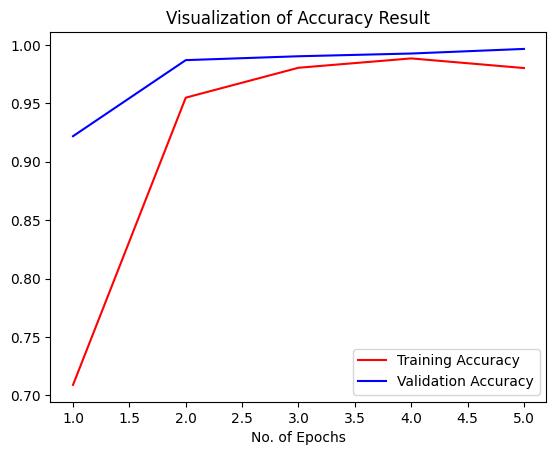

In [7]:
import json
import matplotlib.pyplot as plt

with open('training_hist.json', 'r') as file:
    training_history = json.load(file)

epochs = [i for i in range(1,6)]
plt.plot(epochs,training_history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()
